# Characterization of Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## The Transfer Function

Different time-domain representations are used to characterize linear time-invariant (LTI) systems. For instance, the constant coefficients of ordinary partial differential equations (ODEs), the [impulse response](../systems_time_domain/impulse_response.ipynb) and the [step response](../systems_time_domain/step_response.ipynb). The [transfer function](../systems_time_domain/eigenfunctions.ipynb#Transfer-Function) denotes the complex factor $H(s)$ an eigenfunction $e^{s t}$ at the input of an LTI system is weighted with when passing through the system. Since the Laplace transform decomposes signals with respect to these eigenfunctions, the transfer function constitutes a representation of an LTI system in the spectral (Laplace or Fourier) domain. The links between the transfer function and the time-domain representations of LTI systems are discussed in this section.

### Relation to Impulse Response and In-/Output Signal

It was already outlined in the context of the [convolution theorem of the Fourier](../fourier_transform/theorems.ipynb#Convolution-Theorem) and [Laplace transform](../laplace_transform/theorems.ipynb#Convolution-Theorem), that an LTI system can be represented equivalently in the temporal and spectral domain. In the temporal domain the output $y(t)$ of an LTI system is given by convolving the input signal $x(t)$ with the [impulse response](../systems_time_domain/impulse_response.ipynb) $h(t)$ of the system

\begin{equation}
y(t) = x(t) * h(t)
\end{equation}

Applying the convolution theorem of the Laplace transform yields

\begin{equation}
Y(s) = X(s) \cdot H(s)
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$ and $Y(s) = \mathcal{L} \{ y(t) \}$ are the Laplace transforms of the input and output signal, respectively. The transfer function $H(s)$ is given as the Laplace transform of the impulse response $h(t)$

\begin{equation}
H(s) = \mathcal{L} \{ h(t) \}
\end{equation}

This may also be concluded from the [previously derived link between the impulse response and the transfer function](../systems_time_domain/eigenfunctions.ipynb#Link-between-Transfer-Function-and-Impulse-Response). The derived results show that an LTI system can be fully characterized either in the temporal or spectral domain by its impulse response $h(t)$ or transfer function $H(s)$ or $H(j \omega)$, respectively.

![LTI system in the temporal and spectral domain](LTI_system_time_spectral_domain.png)

It can furthermore be concluded that the transfer function is given as the quotient between output $Y(s)$ and input signal $X(s)$ in the Laplace domain

\begin{equation}
H(s) = \frac{Y(s)}{X(s)}
\end{equation}

for $X(s) \neq 0$. The same relations hold in the Fourier domain if the region of convergence (ROC) of the impulse response includes the imaginary axis $\Re \{ s \} = 0$. In general, the transfer function can be derived by divison of the spectra of the output and input signal. This can be used to measure the transfer function of a system by specific input signals that fulfill $X(s) \neq 0$ with $X(s) \approx$ constant.

**Example**

The [transfer function $H(s)$ of the 2nd order low-pass filter](../systems_time_domain/network_analysis.ipynb#Transfer-Function) was derived as

\begin{equation}
H(s) = \frac{1}{C L s^2 + C R s + 1}
\end{equation}

According to above findings, the impulse response $h(t)$ of the low-pass is given by inverse Laplace transform of the transfer function $H(s)$. First the transfer function is defined in `SymPy`

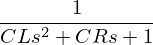

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

R, L, C = sym.symbols('R L C', positive=True)
s = sym.symbols('s', complex=True)

H = 1/(C*L*s**2 + C*R*s + 1)
H

Then the inverse Laplace transform is computed for the specific normalized values $L = .5$, $R = 1$, $C = .4$ of the network elements

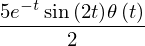

In [2]:
t = sym.symbols('t', real=True)
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

h = sym.inverse_laplace_transform(H.subs(RLC), s, t)
h

This result is plotted for illustration

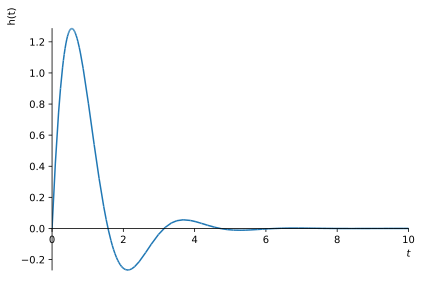

In [3]:
sym.plot(h, (t, 0, 10), xlabel='$t$', ylabel='h(t)')

Note, the result is equal to the [impulse response derived by explicit solution of the underlying ODE](../systems_time_domain/network_analysis.ipynb#Impulse-Response).

### Relation to Differential Equations

Linear ODEs with constant coefficients describing the relation between input $x(t)$ and output $y(t)$ represent an LTI system. In this case a system is characterized by the constants $\alpha_n$ and $\beta_m$ of the ODE

\begin{equation}
\sum_{n=0}^{N} \alpha_n \frac{d^n}{d t^n} y(t) = \sum_{m=0}^{M} \beta_m \frac{d^m}{d t^m} x(t)
\end{equation}

where $\alpha_N \neq 0$ with $N$ denoting the degree of the ODE. Initial values are discarded in the following. Applying a two-sided Laplace transform to the left- and right-hand-side and using the [differentiation theorem](../laplace_transform/theorems.ipynb#Differentiation-Theorem) yields

\begin{equation}
Y(s) \sum_{n=0}^{N} \alpha_n s^n = X(s) \sum_{m=0}^{M} \beta_m s^m
\end{equation}

Rearranging this result derives the transfer function $H(s)$ of the system as

\begin{equation}
H(s) = \frac{Y(s)}{X(s)} = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}

The transfer function of an LTI system whose in- and output relation can be characterized by an ODE is given as rational function in $s$. The coefficients of its numerator and denominator polynomial are given by the coefficients $\beta_m$ and $\alpha_n$ of the ODE. The conversion between both representations of an LTI system is therefore straightforward.

**Example**

The coefficients for the 2nd order low-pass filter can be determined [from its ODE](../systems_time_domain/network_analysis.ipynb#Differential-Equation) or from above transfer function as

\begin{align}
\beta_0 &= 1 & \alpha_0 &= 1 \\
& & \alpha_1 &= C R \\
& & \alpha_2 &= C L
\end{align}

From theses coefficients the transfer function $H(s)$ is constructed in `SymPy`

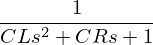

In [4]:
R, L, C = sym.symbols('R L C', positive=True)
beta = 1
alpha = L*C, R*C, 1

H = sym.Poly(beta, s) / sym.Poly(alpha, s)
H

Many software packages for signal processing feature functionality for the computation of the transfer function from the coefficients $\beta_m$ and $\alpha_n$ of a system. For instance, the Python signal processing toolbox [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) provides a function to numerically evaluate the transfer function $H(j \omega)$ at a number of angular frequencies $\omega_i$ for a given set of coefficients. This is illustrated in the following for the normalized values $R$, $L$ and $C$ used above.

In [5]:
from scipy import signal

R = 1
L = 0.5
C = 0.4
beta = 1
alpha = L*C, R*C, 1

w, H = signal.freqresp((beta, alpha))

This results in the vector `w` of discrete angular frequencies $\omega_i$ and the vector `H` with the values of $H(j \omega)$ at these frequencies. The latter is plotted with the Python plotting library [`matplotlib`](http://matplotlib.org/).

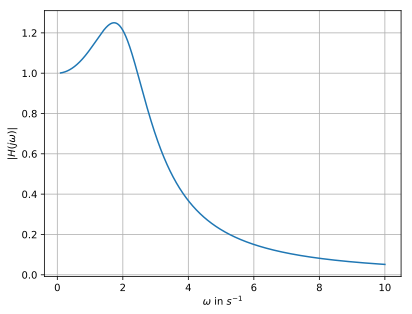

In [6]:
import matplotlib.pyplot as plt

plt.plot(w, abs(H))
plt.xlabel('$\omega$ in $s^{-1}$')
plt.ylabel('$|H(j \omega)|$')
plt.grid();

### Determination from Internal Structure

The transfer function $H(s)$ can be determined from the internal structure of an LTI system, if known. Either by derivation of the ODE characterizing the system, as shown above, or by direct analysis of the system in the Laplace/Fourier domain. For passive electrical networks this can be conducted by representing the signals and elements of the network by their complex impedances $Z(s)$ and applying Kirchhoff's circuit laws. This was illustrated for instance by the previous [Laplace domain analysis of a 2nd order low-pass filter](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter). Similar procedures can be applied to other types of LTI systems, e.g. mechanical systems.

The transfer function is then given as the quotient between the output signal $Y(s)$ and the input signal $X(s)$ in the Laplace/Fourier domain.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.